# Joining Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

### Join the data from Part 1 with the data from Part 2 to create a new dataframe.

Importing the dataframes from part 1 and 2

In [2]:
yelp_df = pd.read_csv('../data/yelp_data2.csv')

In [3]:
yelp_df.head(1)

,Station Index,Name,Distance (m),Latitude,Longitude,Number of Reviews,Rating,Category,Price 1-4
0,0,Gusto 101,673.3,43.639832,-79.395954,1151,4.0,Italian,2.0


In [4]:
fs_df = pd.read_csv('../data/fs_data2.csv')

In [5]:
fs_df.head(1)

,Station Index,Name,Rating,Price 1-4,Distance (m),Latitude,Longitude,Category,Total Ratings
0,0,CAFE Dispensary,7.8,1.0,40,43.639832,-79.395954,Café,8.0


In [6]:
bike_df = pd.read_csv('../data/bike_df2.csv')

In [7]:
bike_df.head(1)

,Station Id,Name,Latitude,Longitude,Number of Bikes
0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954,6


### Exploration

In [8]:
#comparing yelp venues to FS venues based on citybike stations

y_venues = yelp_df[yelp_df['Station Index'] == 0]
fs_venues = fs_df[fs_df['Station Index'] == 0]
combined_venues = pd.DataFrame({
    'Yelp Name': y_venues['Name'],
    'Foursquare Name': fs_venues['Name']
})

In [9]:
combined_venues.head(3)

,Yelp Name,Foursquare Name
0,Gusto 101,CAFE Dispensary
1,Hunters Landing,Hunters Landing
2,Mira,Sansotei Ramen


Checking how many venues FS and yelp had in common for random stations. There were some in common for each. But they each also had some unique ones as well.

In [10]:
count_in_common = combined_venues['Yelp Name'].isin(combined_venues['Foursquare Name']).sum()
print("Number of Yelp Names appearing in Foursquare Names at station 0:", count_in_common)

Number of Yelp Names appearing in Foursquare Names at station 0: 10


#### Yelp merge with CityBikes

In [11]:
# Merge based on citybike index and station index

yelp_citybike = yelp_df.merge(bike_df, left_on='Station Index', right_index=True, how='left')
yelp_citybike.head(1)

,Station Index,Name_x,Distance (m),Latitude_x,Longitude_x,Number of Reviews,Rating,Category,Price 1-4,Station Id,Name_y,Latitude_y,Longitude_y,Number of Bikes
0,0,Gusto 101,673.3,43.639832,-79.395954,1151,4.0,Italian,2.0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954,6


#### Foursquare merge with CityBikes

In [12]:
# Merge based on citybike index and station index

fs_citybike = fs_df.merge(bike_df, left_on='Station Index', right_index=True, how='left')
fs_citybike.head(1)

,Station Index,Name_x,Rating,Price 1-4,Distance (m),Latitude_x,Longitude_x,Category,Total Ratings,Station Id,Name_y,Latitude_y,Longitude_y,Number of Bikes
0,0,CAFE Dispensary,7.8,1.0,40,43.639832,-79.395954,Café,8.0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954,6


#### yelp_citybike and fs_citybike merge

More cleaning was needed to address some of the columns and make them uniform between the two.

In [13]:
yelp_citybike_2 = yelp_citybike.copy()

In [14]:
#adding column to differentiate yelp from fs and added rating % column

yelp_citybike_2['Site']='yelp'
yelp_citybike_2['Rating %'] = (yelp_citybike_2['Rating'] / 5) * 100

In [15]:
yelp_citybike_2.head(1)

,Station Index,Name_x,Distance (m),Latitude_x,Longitude_x,Number of Reviews,Rating,Category,Price 1-4,Station Id,Name_y,Latitude_y,Longitude_y,Number of Bikes,Site,Rating %
0,0,Gusto 101,673.3,43.639832,-79.395954,1151,4.0,Italian,2.0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954,6,yelp,80.0


In [16]:
#rearranging the columns

yelp_citybike_2 = yelp_citybike_2.reindex(columns=['Station Index', 'Name_x', 'Category', 'Distance (m)', 'Latitude_x', 'Longitude_x','Rating',	'Rating %', 'Number of Reviews', 'Price 1-4', 'Station Id', 'Name_y', 'Latitude_y', 'Longitude_y', 'Number of Bikes', 'Site'])

In [18]:
#adding 'foursqure' to site column for differentiation and raing %

fs_citybike['Site']='foursquare'
fs_citybike['Rating %'] = (fs_citybike['Rating'] / 10) * 100

In [20]:
#fixing column titles to facilitate merging

fs_citybike.columns = ['Station Index', 'Name_x', 'Rating', 'Price 1-4', 'Distance (m)', 'Latitude_x', 'Longitude_x','Category', 'Number of Reviews','Station Id', 'Name_y', 'Latitude_y', 'Longitude_y', 'Number of Bikes', 'Site', 'Rating %']

In [21]:
#putting columns in the same order as the other df

fs_citybike = fs_citybike.reindex(columns=['Station Index', 'Name_x', 'Category', 'Distance (m)', 'Latitude_x', 'Longitude_x','Rating',	'Rating %', 'Number of Reviews', 'Price 1-4', 'Station Id', 'Name_y', 'Latitude_y', 'Longitude_y', 'Number of Bikes', 'Site'])

In [23]:
#Merging the 2 df together

yelp_fs_citybike_df= pd.concat([yelp_citybike_2, fs_citybike], ignore_index=True)
yelp_fs_citybike_df.head(1)

,Station Index,Name_x,Category,Distance (m),Latitude_x,Longitude_x,Rating,Rating %,Number of Reviews,Price 1-4,Station Id,Name_y,Latitude_y,Longitude_y,Number of Bikes,Site
0,0,Gusto 101,Italian,673.3,43.639832,-79.395954,4.0,80.0,1151.0,2.0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954,6,yelp


#### Additional Cleaning

Station index was initally helpful in joining the FS and Yelp df to the citybikes df in order to make sure the venues where being paired up with the proper bike station. Now that they are all joined, the station id is redundent to the Station Id and can be removed.

In [25]:
#removing extra Latitude, longitue and Station Index columns.

columns_to_drop = [ 'Latitude_x', "Longitude_x", 'Station Index']
yelp_fs_citybike_df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [26]:
#Fixing column names

yelp_fs_citybike_df.columns = ['Name', 'Category', 'Distance (m)', 'Rating', 'Rating %', 'Number of Reviews', 'Price 1-4', 'Station Id', 'Station Name', 'Latitude', 'Longitude', 'Number of Bikes', 'Site']

In [27]:
#Checking Nulls, 81 in 'category' on first check. I don't think the other nulls need to be addressed at this time.

print(yelp_fs_citybike_df.isnull().sum())

Name                     0
Category                81
Distance (m)             0
Rating                4136
Rating %              4136
Number of Reviews     4136
Price 1-4            18600
Station Id               0
Station Name             0
Latitude                 0
Longitude                0
Number of Bikes          0
Site                     0
dtype: int64


Venues were checked against each other to see if there was category information that could be used in replacement for NaN values.

In [28]:
yelp_fs_citybike_df[yelp_fs_citybike_df['Name'].str.contains('Birchmount Park Collegiate Institute')]

,Name,Category,Distance (m),Rating,Rating %,Number of Reviews,Price 1-4,Station Id,Station Name,Latitude,Longitude,Number of Bikes,Site
51418,Birchmount Park Collegiate Institute,NaN,941.0,NaN,NaN,NaN,NaN,7734,Danforth Ave / Warden Ave,43.695019,-79.271807,0,foursquare
51434,Birchmount Park Collegiate Institute,NaN,742.0,NaN,NaN,NaN,NaN,7735,Birchcliff Ave / Kingston Rd,43.691688,-79.265027,9,foursquare
51446,Birchmount Park Collegiate Institute,NaN,424.0,NaN,NaN,NaN,NaN,7736,Birchmount Rd / Kingston Rd,43.694013,-79.262572,12,foursquare
51461,Birchmount Park Collegiate Institute,NaN,327.0,NaN,NaN,NaN,NaN,7737,Kingston Rd / Glen Everest Rd,43.697490,-79.256551,8,foursquare
51491,Birchmount Park Collegiate Institute,NaN,641.0,NaN,NaN,NaN,NaN,7738,Highview Ave / Kennedy Rd,43.702419,-79.256317,14,foursquare


The coding to fix the categories was used repeatedly until the NaN values were filled. You will need to import the yelp_fs_citybike_df.csv below to continue with the dataframe that has the corrected categories.

This took some time to do and I did not show the entire process. The csv is from df with fixed categories.

In [36]:
"""
#adding categories where applicable. 

yelp_fs_citybike_df.loc[yelp_fs_citybike_df['Name'].str.contains("Birchmount Park Collegiate Institute"), 'Category'] = 'High School'
"""

In [29]:
yelp_fs_citybike_df = pd.read_csv('../data/yelp_fs_citybike_df.csv')

In [30]:
yelp_fs_citybike_df.head(1)

,Name,Category,Distance (m),Rating,Rating %,Number of Reviews,Price 1-4,Station Id,Station Name,Latitude,Longitude,Number of Bikes,Site
0,Gusto 101,Italian,673.3,4.0,80.0,1151.0,2.0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954,6,yelp


In [31]:
print(yelp_fs_citybike_df['Category'].isnull().sum())

0


### Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

My EDA process was long and I feel like it continued well into the model building process. As I searched for things that could show a correllation with each other, I took time to appreciate the importance of a lack of correllation as well and that there is still important infomation to be obtained from individual visualizations. My initial thoughts on seeing the data and the problem was that maybe there were more bikes at a station surounded by venues with a higher rating in a closer distance, which will be explored more in [model_building](./Computer Courses/LHL Data Bootcamp/LHL Projects/Python Modelling Project/notebooks/model_building.ipynb)

In [32]:
#creating a df with unique venues

unique_venues = yelp_fs_citybike_df[['Name', 'Category', 'Distance (m)', 'Rating %', 'Number of Reviews', 'Price 1-4']].copy()

In [33]:
unique_venues = unique_venues.groupby('Name').head(1)
unique_venues.shape

(5603, 6)

In [34]:
rating_count = unique_venues['Rating %'].value_counts()
rating_count.head(5)

80.0     989
70.0     725
90.0     606
60.0     279
100.0    222
Name: Rating %, dtype: int64

In [35]:
unique_venues.head(1)

,Name,Category,Distance (m),Rating %,Number of Reviews,Price 1-4
0,Gusto 101,Italian,673.3,80.0,1151.0,2.0


Text(0.5, 1.0, 'Distance from Venue to Bike Station in Meters')

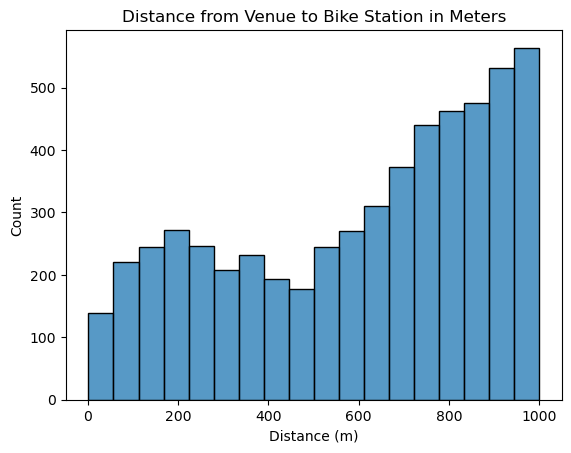

In [38]:
#histogram of the distances to the bike stations

sns.histplot(unique_venues['Distance (m)'])
plt.title("Distance from Venue to Bike Station in Meters")

You can see from the Distance histogram that most of the venues are more than 500m away from the stations.

Text(0.5, 1.0, 'Venue Ratings')

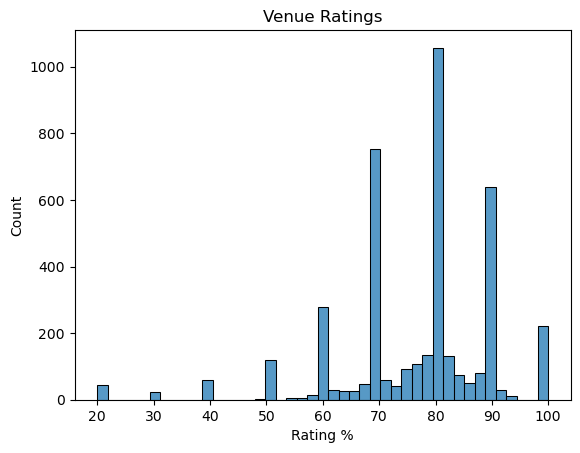

In [39]:
#histogram of the rating %

sns.histplot(unique_venues['Rating %'])
plt.title("Venue Ratings")

It is actually a bit surprising to me that there are not more rating percentages in the lower ranges, as I frequently thought that people who were unhappy with their service or experience were more likely to post a rating or review.

### Rating vs Price

In [41]:
#creating frame with select information

rating_vs_num = unique_venues[['Rating %','Number of Reviews', 'Price 1-4' ]]
rating_vs_num.head(1)

,Rating %,Number of Reviews,Price 1-4
0,80.0,1151.0,2.0


In [43]:
#Removing NaN values

rating_vs_num=rating_vs_num.dropna()
rating_vs_num.head(1)

,Rating %,Number of Reviews,Price 1-4
0,80.0,1151.0,2.0


The price column is a categorical representation of the price ranges for the venues, 1 being least expensive and 4 being the most.

In [44]:
rating_vs_num.describe()

,Rating %,Number of Reviews,Price 1-4
count,2385.000000,2385.000000,2385.000000
mean,75.103564,112.015933,1.870021
std,11.471028,190.444990,0.672353
min,20.000000,1.000000,1.000000
25%,70.000000,23.000000,1.000000
50%,80.000000,55.000000,2.000000
75%,80.000000,126.000000,2.000000
max,100.000000,3474.000000,4.000000


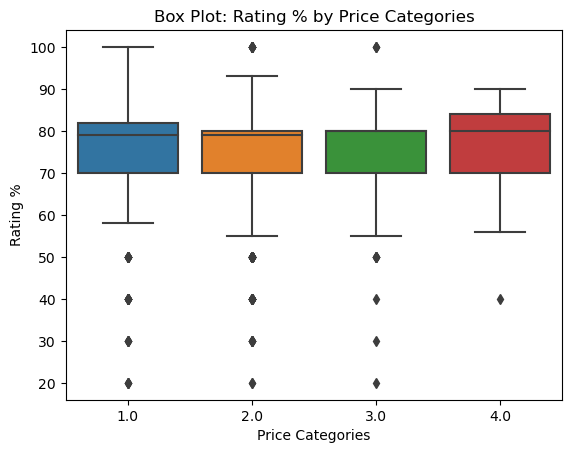

In [45]:
#creating box plot

sns.boxplot(x='Price 1-4', y='Rating %', data=rating_vs_num)
plt.xlabel('Price Categories')
plt.ylabel('Rating %')
plt.title('Box Plot: Rating % by Price Categories')
plt.show()

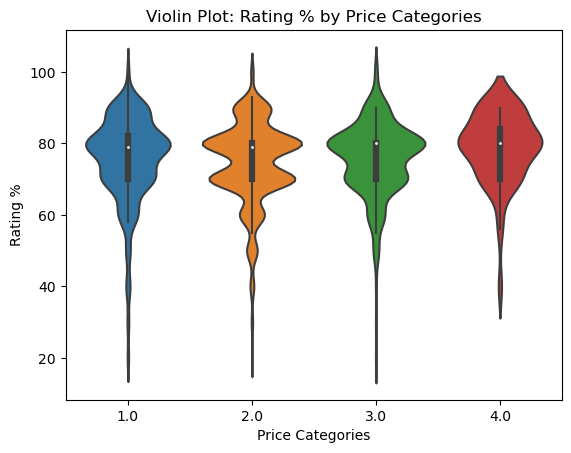

In [50]:
#Creating violin plot

sns.violinplot(x='Price 1-4', y='Rating %', data=rating_vs_num)
plt.xlabel('Price Categories')
plt.ylabel('Rating %')
plt.title('Violin Plot: Rating % by Price Categories')
plt.show()

From the box and violing plots you can easily see that the median ratings are very close to each other and you can see where the bulk of the ratings lie, between the 70-80 % mark.

In [51]:
#creating column with the average rating

average_rating = rating_vs_num.groupby('Price 1-4')['Rating %'].mean()
avg_rating_per_price = pd.DataFrame({
    'Price 1-4':average_rating.index,
    'Average Rating %': average_rating.values     
 })

In [52]:
#average rating per price category

avg_rating_per_price

,Price 1-4,Average Rating %
0,1.0,75.596067
1,2.0,74.657083
2,3.0,75.571429
3,4.0,78.811321


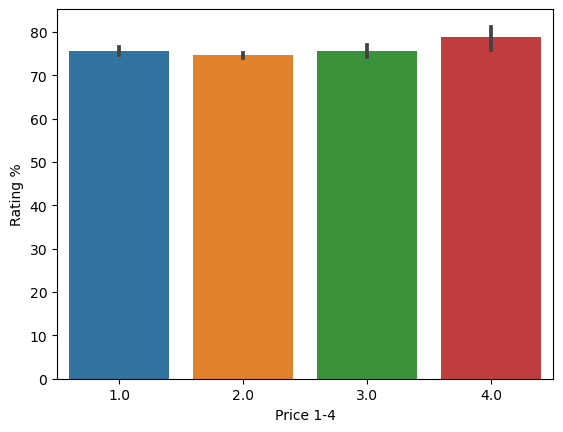

In [59]:
#creating bar plot for rating % in price categories

sns.barplot(data=rating_vs_num, x='Price 1-4', y='Rating %')
plt.show()

These are all fairly even. The most expensive restaurants seem to have a slight higher rating average.

Because Price 1-4 is a categorical value, I also did a one way ANOVA test.

In [60]:
price_1 = rating_vs_num[rating_vs_num['Price 1-4']==1]['Rating %']
price_2 = rating_vs_num[rating_vs_num['Price 1-4']==2]['Rating %']
price_3 = rating_vs_num[rating_vs_num['Price 1-4']==3]['Rating %']
price_4 = rating_vs_num[rating_vs_num['Price 1-4']==4]['Rating %']

stat,p = stats.f_oneway(price_1, price_2, price_3, price_4)
p

0.025186298088042625

H<sub>0</sub> = no significance in the means

The p score is <0.05 suggesting that price may have an affect on rating.

In [61]:
rating_vs_num['Price 1-4'].value_counts()

2.0    1426
1.0     661
3.0     245
4.0      53
Name: Price 1-4, dtype: int64

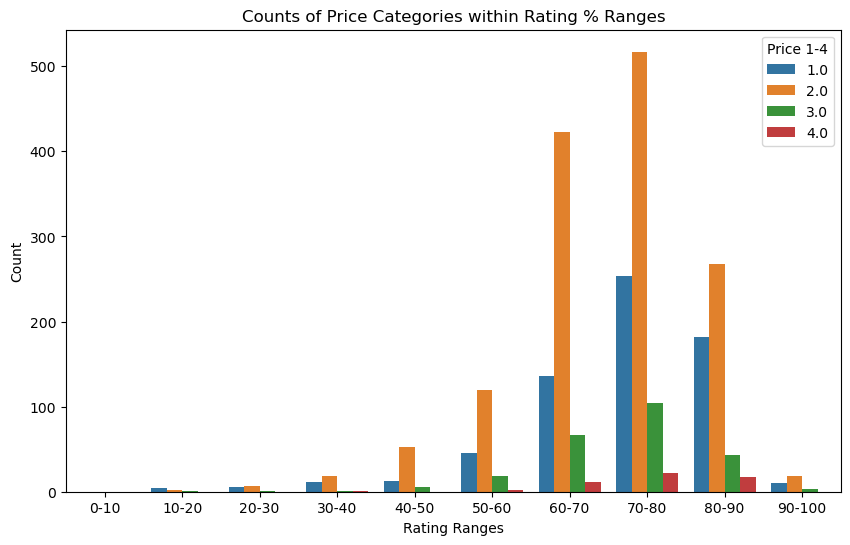

In [62]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Create a new DataFrame by copying the relevant data
rating_vs_num_copy = rating_vs_num.copy()

# Set values using direct column assignment to avoid warning
rating_vs_num_copy['Rating % Range'] = pd.cut(rating_vs_num_copy['Rating %'], bins=bins, labels=labels, include_lowest=True)

# Group and count
price_counts = rating_vs_num_copy.groupby(['Rating % Range', 'Price 1-4']).size().reset_index(name='Count')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=price_counts, x='Rating % Range', y='Count', hue='Price 1-4')
plt.xlabel('Rating Ranges')
plt.ylabel('Count')
plt.title('Counts of Price Categories within Rating % Ranges')
plt.legend(title='Price 1-4')
plt.show()

This chart shows breakdown of the number of ratings in a specific range with regards to what venue price range they were allocated to. While it is not very important to be able to compare the counts in each price category to each other, as we can see that there are many more venues in the price 2 range, it is interesting to be able to compare the price categories to themselves across the percent ranges.

### Number of Bikes in relation to Distance

In [63]:
yelp_fs_citybike_df.head(1)

,Name,Category,Distance (m),Rating,Rating %,Number of Reviews,Price 1-4,Station Id,Station Name,Latitude,Longitude,Number of Bikes,Site
0,Gusto 101,Italian,673.3,4.0,80.0,1151.0,2.0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954,6,yelp


In [71]:
#creating df with unique venues by station id

unique_venue_by_station = yelp_fs_citybike_df[['Name', 'Category','Distance (m)', 'Rating %', 'Price 1-4', 'Station Id', 'Station Name','Number of Bikes' ]].copy()

In [72]:
unique_venue_by_station = unique_venue_by_station.drop_duplicates(subset=['Name', 'Station Id'], keep='first')

In [73]:
unique_venue_by_station.head(1)

,Name,Category,Distance (m),Rating %,Price 1-4,Station Id,Station Name,Number of Bikes
0,Gusto 101,Italian,673.3,80.0,2.0,7000,Fort York Blvd / Capreol Ct,6


Looking at the top rated categories per station

In [74]:
#List of unique station ids

stn_id = unique_venue_by_station['Station Id']
stn_id = stn_id.unique()

In [75]:
#collecting the top 3 rated venue categories per station

top_rated_per_stn = {}

for num in stn_id:
    stn_data = unique_venue_by_station[unique_venue_by_station['Station Id'] == num]
    top_rates = stn_data.sort_values(by='Rating %', ascending=False).head(3)
    top_rated_per_stn[num] = top_rates[['Rating %', 'Name', 'Category']]

In [76]:
#df with the top 3 ratings per station

data_list = []
for station_id, top_ratings in top_rated_per_stn.items():
    for _, row in top_ratings.iterrows():
        data_list.append({
            'Station Id': station_id,
            'Rating %': row['Rating %'],
            'Name': row['Name'],
            'Category': row['Category']
        })

top_ratings_df = pd.DataFrame(data_list)

In [77]:
top_ratings_df.head()

,Station Id,Rating %,Name,Category
0,7000,93.0,Steam Whistle Brewing,Brewery
1,7000,93.0,SOMA chocolatemaker,Peruvian Restaurant
2,7000,92.0,Sky Pod,Scenic Lookout
3,7001,100.0,Gurume Sushi,Sushi Bars
4,7001,93.0,Hailed Coffee,Coffee Shop


In [78]:
category_counts = top_ratings_df['Category'].value_counts()
category_counts.head(5)

Park          113
Cafes          89
Pizza          77
Indian         73
Sushi Bars     72
Name: Category, dtype: int64

# Database

#### Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [82]:
import pandas as pd
import sqlite3
from sqlite3 import Error
from sqlite3 import connect

In [83]:
df = pd.read_csv(r'../data/unique_venue_by_stn.csv')

In [84]:
conn = connect(r"../data/yelp_foursquare_citybikes.db")
curr = conn.cursor()

In [85]:
curr.execute('''
    CREATE TABLE IF NOT EXISTS yelp_foursquare_citybikes (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        name TEXT NOT NULL,
        category TEXT,
        distance FLOAT,
        rating INTEGER,
        rating_perc INTEGER,
        number_of_reviews INTEGER, -- Corrected the typo in the column type
        price_1_4 INTEGER,
        station_id INTEGER,
        station_name TEXT,
        latitude FLOAT,
        longitude FLOAT,
        number_of_bikes INTEGER,
        site TEXT
    )
''')

conn.commit()

In [86]:
df.to_sql('yelp_foursquare_citybikes', conn, if_exists='replace')

48894

### Look at the data before and after the join to validate your data.

In [87]:
df.head(10)

,Name,Category,Distance,Rating %,Price 1-4,Station Id,Station Name,Number of Bikes
0,Gusto 101,Italian,673.3,80.0,2.0,7000,Fort York Blvd / Capreol Ct,6
1,Hunters Landing,Comfort Food,60.9,70.0,2.0,7000,Fort York Blvd / Capreol Ct,6
2,Mira,Peruvian,472.0,90.0,2.0,7000,Fort York Blvd / Capreol Ct,6
3,Sansotei Ramen,Ramen,202.6,80.0,2.0,7000,Fort York Blvd / Capreol Ct,6
4,Jacobs & Co. Steakhouse,Steakhouses,641.1,90.0,4.0,7000,Fort York Blvd / Capreol Ct,6
5,Le Sélect Bistro,French,458.7,80.0,3.0,7000,Fort York Blvd / Capreol Ct,6
6,Aloette,French,970.3,90.0,3.0,7000,Fort York Blvd / Capreol Ct,6
7,Chubby's Jamaican Kitchen,Caribbean,722.9,80.0,2.0,7000,Fort York Blvd / Capreol Ct,6
8,Rodney's Oyster House,Seafood,573.4,80.0,3.0,7000,Fort York Blvd / Capreol Ct,6
9,Pizzeria Libretto,Pizza,534.8,80.0,2.0,7000,Fort York Blvd / Capreol Ct,6


In [88]:
curr.execute('''SELECT * FROM yelp_foursquare_citybikes''')

limit = 10  # Change this to the desired limit

for i, record in enumerate(curr.fetchall()):
    print(record)
    if i + 1 >= limit:
        break

(0, 'Gusto 101', 'Italian', 673.3, 80.0, 2.0, 7000, 'Fort York  Blvd / Capreol Ct', 6)
(1, 'Hunters Landing', 'Comfort Food', 60.9, 70.0, 2.0, 7000, 'Fort York  Blvd / Capreol Ct', 6)
(2, 'Mira', 'Peruvian', 472.0, 90.0, 2.0, 7000, 'Fort York  Blvd / Capreol Ct', 6)
(3, 'Sansotei Ramen', 'Ramen', 202.6, 80.0, 2.0, 7000, 'Fort York  Blvd / Capreol Ct', 6)
(4, 'Jacobs & Co. Steakhouse', 'Steakhouses', 641.1, 90.0, 4.0, 7000, 'Fort York  Blvd / Capreol Ct', 6)
(5, 'Le Sélect Bistro', 'French', 458.7, 80.0, 3.0, 7000, 'Fort York  Blvd / Capreol Ct', 6)
(6, 'Aloette', 'French', 970.3, 90.0, 3.0, 7000, 'Fort York  Blvd / Capreol Ct', 6)
(7, "Chubby's Jamaican Kitchen", 'Caribbean', 722.9, 80.0, 2.0, 7000, 'Fort York  Blvd / Capreol Ct', 6)
(8, "Rodney's Oyster House", 'Seafood', 573.4, 80.0, 3.0, 7000, 'Fort York  Blvd / Capreol Ct', 6)
(9, 'Pizzeria Libretto', 'Pizza', 534.8, 80.0, 2.0, 7000, 'Fort York  Blvd / Capreol Ct', 6)
